# Occlusion sensitivity for all_model

Sources:  
https://github.com/BUPTLdy/occlusion_experiments/blob/master/Occlusion_experiments.ipynb  
https://github.com/oswaldoludwig/Sensitivity-to-occlusion-Keras-/blob/master/occlusion_sensitivity.py  
https://github.com/matheushent/covid-19-detector/blob/master/vis.py  
https://pypi.org/project/tf-explain/0.0.1a0/  
https://www.mdpi.com/1424-8220/20/11/3307

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

from sklearn.model_selection import train_test_split

import keras

import tensorflow as tf

2024-05-14 15:41:00.038869: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
def set_reproducible():
    np.random.seed(12345)
    random.seed(12345)
    tf.random.set_seed(12345)
    
set_reproducible()

In [3]:
dps1200 = pd.read_csv("/home/mel/Masterthesis/Masterthesis_code/raw_data/csv/dps1200_all.csv")

In [4]:
dps1200.rename(columns=lambda x: x.replace('X', ''), inplace=True)

In [5]:
y = dps1200.iloc[:,4:]
xp = y.columns.values
xp = xp.astype(int)

In [6]:
features = dps1200.iloc[:, 4:].values
labels = dps1200.iloc[:, 0].values

In [7]:
train_data, test_data, train_labels, test_labels = train_test_split(features, labels, test_size=0.2, random_state=42)

In [8]:
print(test_data.shape)

(260, 1866)


In [9]:
model_path = "/home/mel/Masterthesis/Masterthesis_code/code/all_data/dps1200all_model.keras"

In [ ]:
dps1200all_model = tf.keras.models.load_model('dps1200all_model.keras')

# Show the model architecture
dps1200all_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gaussian_noise (GaussianNoise)  │ (None, 1866, 1)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 1833, 24)       │           840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 916, 24)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 820, 52)        │       121,108 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 410, 52)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 21320)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 21320)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 422)            │     8,997,462 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           423 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,359,501 (104.37 MB)

 Trainable params: 9,119,833 (34.79 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 18,239,668 (69.58 MB)

In [ ]:
print(type(dps1200all_model))

<class 'keras.src.models.sequential.Sequential'>


# Occlusion

In [ ]:
import math
import seaborn as sns
import copy

## Feature importance for each sample

260 311
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
9/9 

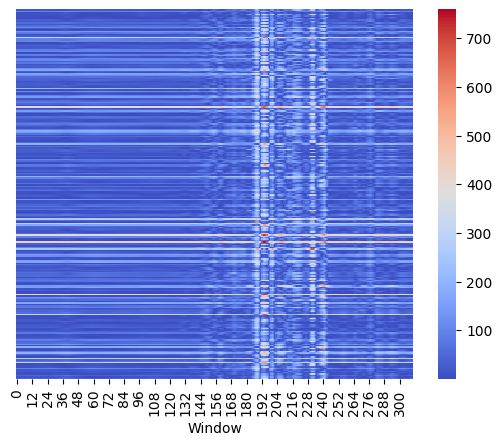

In [ ]:
occluding_size = 6
num_columns = test_data.shape[1]
step = occluding_size

output_height = test_data.shape[0]
output_width = math.ceil(num_columns/occluding_size)
print(output_height,output_width)

heatmap = np.zeros((output_height, output_width))
i = 0

for window in range(0, num_columns, step):
   input_data = copy.copy(test_data)
   end_index = min(window + step, num_columns)
   input_data[:, window:end_index] = 0
   output = dps1200all_model.predict(input_data)
   importance = abs(output.flatten() - test_labels)
   heatmap[:, i] += importance
   i += 1

ax = sns.heatmap(heatmap, cmap='coolwarm', yticklabels=False)
plt.xlabel('Window')
plt.show()
    

## Feature importance for sorted samples

In [ ]:
test_labels_2d = test_labels.reshape(-1, 1)
test_all = np.concatenate((test_labels_2d, test_data), axis=1)


sorted_indices = np.argsort(test_all[:, 0])
test_all_sorted = test_all[sorted_indices]

sorted_test_labels = test_all_sorted[:, 0]
sorted_test_data = test_all_sorted[:, 1:]

print("Sortierte Labels:")
print(sorted_test_labels)
print("\nSortierte Daten:")
print(sorted_test_data)

Sortierte Labels:
[1216. 1249. 1254. 1261. 1271. 1276. 1281. 1286. 1326. 1331. 1337. 1369.
 1372. 1375. 1389. 1391. 1402. 1416. 1424. 1426. 1433. 1436. 1444. 1444.
 1445. 1449. 1453. 1464. 1468. 1471. 1481. 1491. 1492. 1493. 1512. 1517.
 1526. 1530. 1546. 1551. 1555. 1559. 1561. 1569. 1571. 1571. 1580. 1583.
 1589. 1589. 1590. 1592. 1593. 1596. 1599. 1599. 1600. 1607. 1608. 1610.
 1612. 1613. 1614. 1628. 1629. 1632. 1634. 1635. 1636. 1639. 1639. 1642.
 1651. 1652. 1652. 1655. 1657. 1666. 1666. 1667. 1668. 1677. 1677. 1678.
 1679. 1682. 1682. 1683. 1684. 1685. 1686. 1687. 1688. 1689. 1689. 1690.
 1690. 1691. 1692. 1695. 1698. 1700. 1701. 1701. 1702. 1704. 1707. 1708.
 1709. 1712. 1712. 1715. 1718. 1719. 1719. 1721. 1723. 1727. 1729. 1730.
 1732. 1735. 1735. 1736. 1738. 1739. 1740. 1748. 1752. 1754. 1755. 1756.
 1759. 1763. 1765. 1766. 1768. 1769. 1772. 1773. 1774. 1775. 1777. 1779.
 1780. 1780. 1782. 1788. 1792. 1793. 1795. 1795. 1796. 1801. 1805. 1811.
 1811. 1821. 1823. 1829. 1833. 18

260 311
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
9/9 

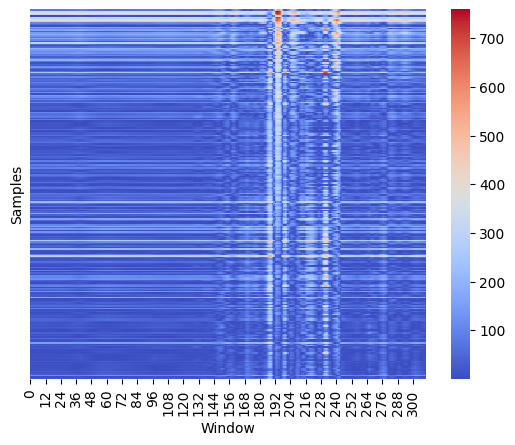

In [ ]:
occluding_size = 6
num_columns = sorted_test_data.shape[1]
step = occluding_size

output_height = sorted_test_data.shape[0]
output_width = math.ceil(num_columns/occluding_size)
print(output_height,output_width)

heatmap = np.zeros((output_height, output_width))
i = 0

for window in range(0, num_columns, step):
   input_data = copy.copy(sorted_test_data)
   end_index = min(window + step, num_columns)
   input_data[:, window:end_index] = 0
   output = dps1200all_model.predict(input_data)
   importance = abs(output.flatten() - sorted_test_labels)
   heatmap[:, i] += importance
   i += 1

ax = sns.heatmap(heatmap, cmap='coolwarm', yticklabels=False)
plt.xlabel('Window')
plt.ylabel('Samples')
plt.show()

## Feature importance for each century

In [ ]:
from typing import List

In [ ]:
def convertToCentury(y: List[int]) -> List[int]: 
    return [int(str(year)[:2]) for year in y]
centuries = convertToCentury(sorted_test_labels)
print(centuries)

[12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19,

In [ ]:
unique_centuries, counts = np.unique(centuries, return_counts=True)
print(unique_centuries, counts)
print(len(counts))

[12 13 14 15 16 17 18 19 20] [ 8  8 18 22 45 52 40 66  1]
9


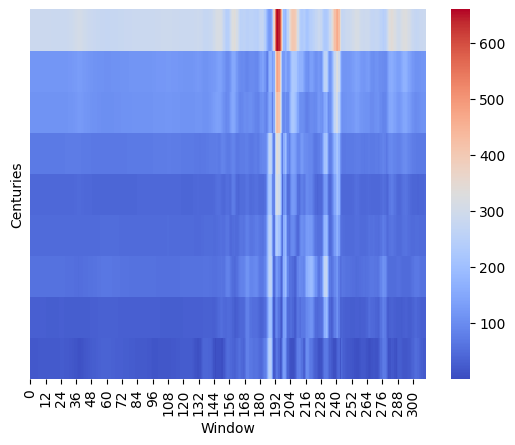

In [ ]:
mean_values = []
i = 0
output_height2 = len(counts)
output_width = math.ceil(num_columns/occluding_size)

heatmap2 = np.zeros((output_height2, output_width))

start_row = 0
for count in counts:
    group_data = heatmap[start_row:start_row+count]
    group_mean = np.mean(group_data, axis=0)    
    heatmap2[i,:] += group_mean
    i += 1
    start_row += count

ax = sns.heatmap(heatmap2, cmap='coolwarm', yticklabels=False)
plt.xlabel('Window')
plt.ylabel('Centuries')
plt.show()

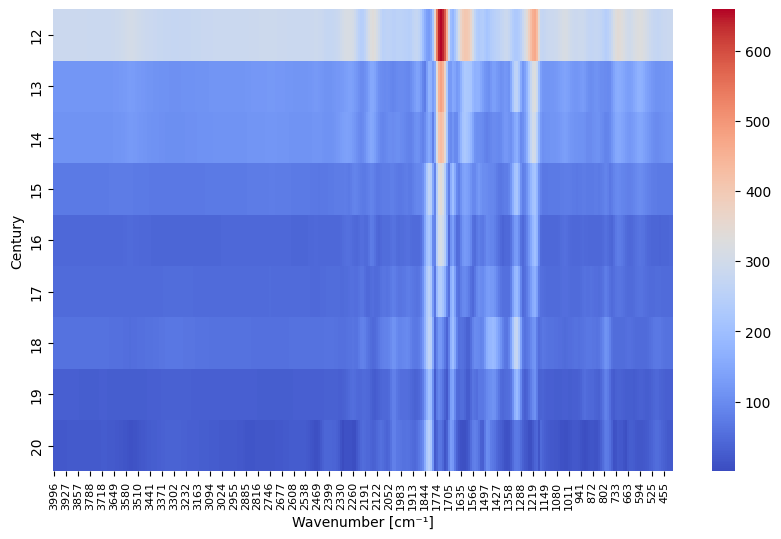

In [ ]:
mean_values = []
i = 0
output_height2 = len(counts)
output_width = math.ceil(num_columns/occluding_size)

heatmap2 = np.zeros((output_height2, output_width))

start_row = 0
for count in counts:
    group_data = heatmap[start_row:start_row+count]
    group_mean = np.mean(group_data, axis=0)    
    heatmap2[i,:] += group_mean
    i += 1
    start_row += count

plt.figure(figsize=(10, 6))
ax = sns.heatmap(heatmap2, cmap='coolwarm')
wavelengths = xp[::36]
plt.xticks(ticks=np.arange(0.5, heatmap2.shape[1] + 0.5, 6), labels=wavelengths, fontsize=8)
plt.xlabel('Wavenumber [cm⁻¹]')

centuries = unique_centuries
plt.yticks(ticks=np.arange(0.5, heatmap2.shape[0] + 0.5), labels=centuries)
plt.ylabel('Century')
plt.show()

In [ ]:
print(heatmap.shape)

(260, 311)


# Heatmap for Comparison

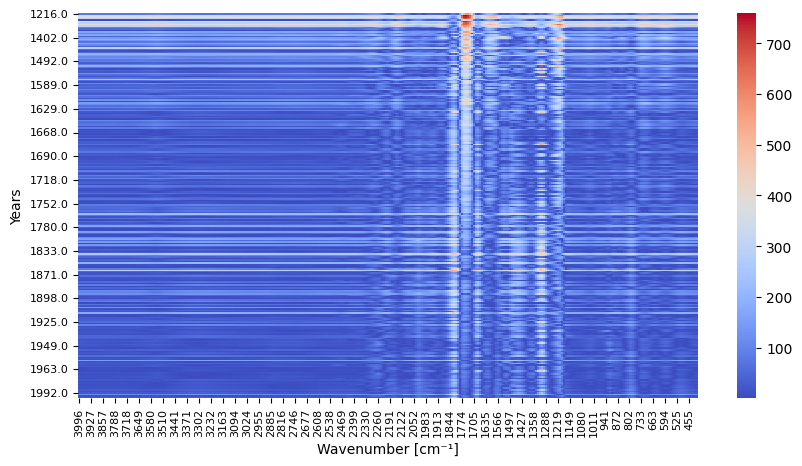

In [ ]:
# Plot Heatmap
wavelengths = xp[::36]
years = sorted_test_labels[::16]

plt.figure(figsize=(10, 5))
sns.heatmap(heatmap, cmap='coolwarm')
plt.xlabel('Wavenumber [cm⁻¹]')
plt.ylabel('Years')
plt.xticks(ticks=np.arange(0.5, heatmap.shape[1] + 0.5, 6), labels=wavelengths, fontsize=8)
plt.yticks(ticks=np.arange(0.5, heatmap.shape[0] + 0.5, 16), labels=years, fontsize=8)
plt.show()